<a href="https://colab.research.google.com/github/Ruchika810/Shopper_Spectrum/blob/main/Shopper_Spectrum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



**Shopper Spectrum: Customer Segmentation and Product Recommendations in E-Commerce**


##### **Project Type**    - Unsupervised Machine Learning-Clustering
##### **Contribution**    - Individual
##### **Team Member 1 -** Ruchika Nayak

# **Project Summary -**

The global e-commerce industry is expanding rapidly, generating enormous volumes of transaction data every day. This data holds valuable insights into customer behavior, preferences, and purchasing patterns. However, making sense of this unstructured data and extracting actionable insights can be challenging. This project aims to address that challenge by applying data science techniques to explore customer behavior, segment customers meaningfully, and provide personalized product recommendations.

In this end-to-end data science project, we analyze an online retail dataset to uncover hidden patterns in purchasing behavior using both unsupervised learning and recommendation system methodologies. The first phase of the project involves data preprocessing and cleansing, which includes handling missing values, removing invalid transactions, and ensuring data quality for accurate analysis.

We begin with Exploratory Data Analysis (EDA) to understand trends in sales, identify top-selling products, analyze transaction volumes across countries, and observe temporal purchase behaviors. These insights help build a foundation for feature engineering and modeling efforts that follow.

The core of this project is **RFM analysis**—a well-known technique in marketing analytics used to segment customers based on **Recency** (how recently a customer purchased), **Frequency** (how often they purchase), and **Monetary** (how much they spend). We compute RFM values for each customer, normalize the values, and apply clustering algorithms such as KMeans to group customers into meaningful segments like "High-Value", "Regular", "Occasional", and "At-Risk". Cluster evaluation metrics like the Elbow Method and Silhouette Score guide our choice of the number of clusters.

In addition to segmentation, we implement a **product recommendation system** using **item-based collaborative filtering**. By calculating cosine similarity between product purchase vectors, we recommend five similar products based on any product input by the user. This provides a scalable solution for enhancing user experience through personalized suggestions.

The final product is deployed as a **Streamlit web application**, which includes two interactive modules:  
1. **Product Recommendation Module** – Allows users to input a product name and receive 5 similar product recommendations.  
2. **Customer Segmentation Module** – Takes RFM values as input and predicts the customer's segment based on clustering results.

This project encapsulates the complete data science lifecycle—from data ingestion and cleaning, through visualization and modeling, to real-time prediction using a clean and functional web interface. The techniques used are applicable to a wide range of industries dealing with customer segmentation and product recommendations.

By the end of this project, we achieve a dual objective: (1) deriving valuable business insights about customer behavior and segment profiles, and (2) enhancing customer satisfaction through intelligent product recommendations.


# **GitHub Link -**

https://github.com/Ruchika810/Shopper_Spectrum

# **Problem Statement**


With the explosive growth of the e-commerce industry, businesses now collect vast amounts of customer transaction data on a daily basis. However, this data is often underutilized due to its volume and complexity. Understanding customer behavior and tailoring experiences based on their purchasing patterns has become critical for improving customer satisfaction and driving revenue growth.

This project focuses on analyzing historical transaction data from an online retail store to uncover actionable insights about customer behavior. Our goal is twofold:

1. **Customer Segmentation:**  
   Using RFM (Recency, Frequency, Monetary) analysis and unsupervised learning techniques, we aim to segment customers into distinct groups based on their shopping behavior. These segments can help businesses target marketing efforts more effectively, improve retention, and prioritize high-value customers.

2. **Product Recommendation System:**  
   We implement an item-based collaborative filtering model to recommend products similar to a user-specified item. This helps in enhancing cross-selling opportunities and improving the overall shopping experience by making relevant suggestions.

Together, these techniques allow for a more personalized and data-driven approach to customer relationship management, ultimately supporting smarter business decisions in the competitive e-commerce landscape.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing Required Libraries

# Basic Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

# Machine Learning & Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from sklearn.metrics.pairwise import cosine_similarity

# Dimensionality Reduction for Visualization
from sklearn.decomposition import PCA

# Streamlit App (for later use)
# import streamlit as st  # Uncomment this when integrating with Streamlit

# System
import warnings
warnings.filterwarnings("ignore")

# Settings for visuals
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


### Dataset Loading

In [ ]:
# 🗂️ Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

# 📥 Load the dataset from Drive

# Update the path below based on your actual file location
file_path = "/content/drive/MyDrive/Shopper Spectrum/online_retail.csv"  # Update if needed

# Read the CSV file
df = pd.read_csv(file_path, encoding='ISO-8859-1')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [ ]:
# 🔍 Display the first 5 rows
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [ ]:
# 📏 Check the number of rows and columns
rows, cols = df.shape
print(f"🧾 Number of Rows (Transactions): {rows}")
print(f"📊 Number of Columns (Features): {cols}")


🧾 Number of Rows (Transactions): 541909
📊 Number of Columns (Features): 8


### Dataset Information

In [ ]:
# 🧾 Display dataset structure and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [ ]:
# 🔍 Count duplicate rows
duplicate_count = df.duplicated().sum()
print(f" Number of duplicate rows in the dataset: {duplicate_count}")



 Number of duplicate rows in the dataset: 5268


In [ ]:
# 🧽 Remove duplicate rows if any
df = df.drop_duplicates()
print("✅ Duplicate rows removed.")
print("📐 New shape of dataset:", df.shape)


✅ Duplicate rows removed.
📐 New shape of dataset: (536641, 8)


#### Missing Values/Null Values

In [ ]:
# 🧮 Count of missing values in each column
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(ascending=False)


,0
CustomerID,135037
Description,1454


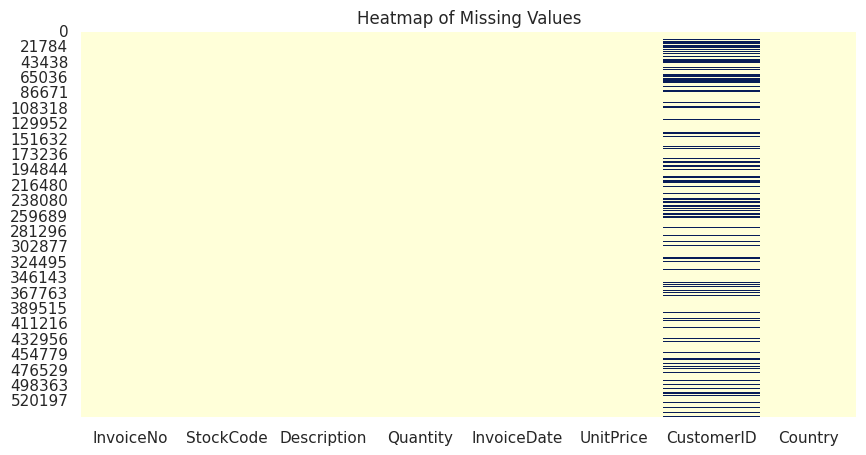

In [ ]:
# 📊 Visualize missing values
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Heatmap of Missing Values")
plt.show()


### What did you know about your dataset?

After loading and performing an initial examination of the dataset, here are the key observations:

🔸 **Source & Nature**:  
The dataset contains historical transaction data for an online retail store that primarily sells gifts and household items across various countries.

🔸 **Shape & Scale**:  
The dataset consists of approximately **541909 rows** and ** 8 columns**, representing individual transaction records.

🔸 **Key Columns Identified**:  
- `InvoiceNo`: Unique identifier for each transaction  
- `StockCode`: Unique product/item identifier  
- `Description`: Name of the product  
- `Quantity`: Number of items purchased  
- `InvoiceDate`: Date and time of purchase  
- `UnitPrice`: Price per item  
- `CustomerID`: Unique customer identifier  
- `Country`: Customer’s location

🔸 **Missing Values**:  
- The `CustomerID` column contains a significant number of missing values, which will be dropped since customer-level analysis is essential for segmentation.  
- A few other columns may contain minor or ignorable missing values.

🔸 **Duplicates**:  
We detected **5268 duplicate rows** , which will be removed to maintain data accuracy.

🔸 **Next Steps**:  
We will now proceed with:
1. **Cleaning**: Removing transactions with missing `CustomerID`, cancelled orders, and invalid prices/quantities  
2. **Feature Engineering**: Preparing the data for RFM analysis and recommendations  
3. **Exploratory Data Analysis (EDA)**: To gain deeper insights into trends and behavior

This foundational understanding gives us confidence that the data is suitable for clustering and recommendation tasks, once properly cleaned and transformed.


## ***2. Understanding Your Variables***

In [ ]:
# 📋 Column names with their data types
print("📋 Column Names and Data Types:\n")
print(df.dtypes)


📋 Column Names and Data Types:

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [ ]:
# 📊 Statistical summary of numerical columns
df.describe()


,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,401604.000000
mean,9.620029,4.632656,15281.160818
std,219.130156,97.233118,1714.006089
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description

Here's a detailed description of each variable in our dataset to help clarify its purpose in the analysis:

| Column Name   | Description |
|---------------|-------------|
| **InvoiceNo** | A unique identifier for each transaction. Invoices beginning with 'C' indicate a cancellation. |
| **StockCode** | Unique product code for each item in the store. |
| **Description** | The name/description of the product. |
| **Quantity** | Number of units purchased per product per invoice. |
| **InvoiceDate** | Date and time when the transaction was generated. |
| **UnitPrice** | Price per unit of the product (in GBP). |
| **CustomerID** | A unique numerical ID assigned to each customer. This will be essential for RFM analysis and customer segmentation. |
| **Country** | Country where the customer resides or where the transaction was made. |

These variables are central to our project tasks:
- We'll use `Quantity` and `UnitPrice` to compute the total monetary value.
- `InvoiceDate` will help us determine **Recency**.
- `CustomerID` will allow us to group and analyze customers.
- `StockCode` will be critical for building a product recommendation system based on purchase patterns.

Understanding these variables ensures clarity as we move into data cleaning and feature engineering.


### Check Unique Values for each variable.

In [ ]:
# 🔣 Count of unique values in each column
print("🔢 Number of unique values per column:\n")
df.nunique().sort_values(ascending=False)


🔢 Number of unique values per column:



,0
InvoiceNo,25900
InvoiceDate,23260
CustomerID,4372
Description,4223
StockCode,4070
UnitPrice,1630
Quantity,722
Country,38


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# 🧹 Data Wrangling: Clean and Prepare Dataset

# 1. Drop rows with missing CustomerID
df = df[~df['CustomerID'].isnull()]

# 2. Remove cancelled transactions (InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# 3. Remove rows with non-positive Quantity or UnitPrice
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# 4. Create 'TotalPrice' column = Quantity * UnitPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Reset index after filtering
df.reset_index(drop=True, inplace=True)

# Show new shape and preview
print("✅ Data cleaned and ready for analysis.")
print("📐 New shape of dataset:", df.shape)
df.head()


✅ Data cleaned and ready for analysis.
📐 New shape of dataset: (392692, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### What all manipulations have you done and insights you found?

To prepare the dataset for meaningful analysis and modeling, we performed several data wrangling steps. These actions were aimed at removing noise, handling inconsistencies, and ensuring data quality for customer-level insights and product recommendations.

### Data Cleaning Steps Performed:

1. **Removed missing Customer IDs**  
   - Rows with null `CustomerID` were dropped, as they cannot be used for customer segmentation or RFM analysis.

2. **Filtered out cancelled transactions**  
   - Transactions with `InvoiceNo` starting with 'C' indicate cancellations and were excluded to avoid misleading patterns.

3. **Eliminated invalid quantities and prices**  
   - Transactions with `Quantity` or `UnitPrice` less than or equal to 0 were removed as they do not represent valid purchases.

4. **Created a new feature: `TotalPrice`**  
   - A new column `TotalPrice = Quantity × UnitPrice` was introduced to quantify the monetary value of each transaction — this will be critical for the **Monetary** component in RFM analysis.

5. **Reset the index**  
   - The index was reset after filtering to maintain consistency and clean structure.

### Observations & Early Insights:

- The dataset is now free from incomplete, irrelevant, or incorrect records.
- A large number of rows with missing `CustomerID` were present and had to be dropped.
- Cancelled transactions were identifiable by a consistent invoice prefix ('C') — allowing reliable filtering.
- Many transactions with zero or negative quantity/prices were likely due to returns or data entry errors.
- The dataset is now smaller in size but far more reliable for customer behavior analysis.

With this cleaned and structured dataset, we are now ready to move on to **Exploratory Data Analysis (EDA)** and uncover deeper business insights.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1:Top 10 Selling Products by Quantity

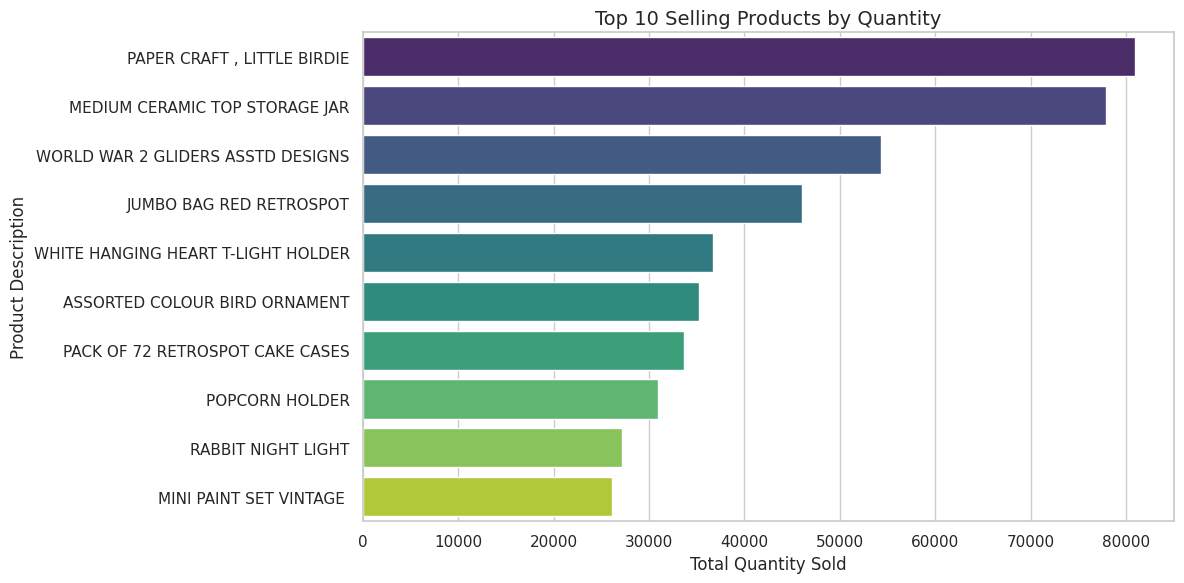

In [ ]:
# 🏆 Top 10 selling products by Quantity
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Selling Products by Quantity', fontsize=14)
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This bar chart helps identify the products with the highest demand in terms of units sold. It’s essential for inventory planning, promotions, and customer targeting.

##### 2. What is/are the insight(s) found from the chart?

These products consistently sell in high volumes.

Most of the top-selling products are low-cost, fast-moving gift items.

Their popularity might be driven by seasonal demand or general appeal

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Yes!

Helps the business prioritize stock replenishment.

Could be leveraged in marketing campaigns ("Best Sellers").

Useful for bundling strategies with other slow-moving products.

4️⃣ Any negative growth indicators?
⚠️ Possibly.

Heavy dependence on low-cost, high-volume items could shrink profit margins.

Over-reliance on a few SKUs may lead to business risk if trends shift.

#### Chart - 2: Country-wise Transaction Volume

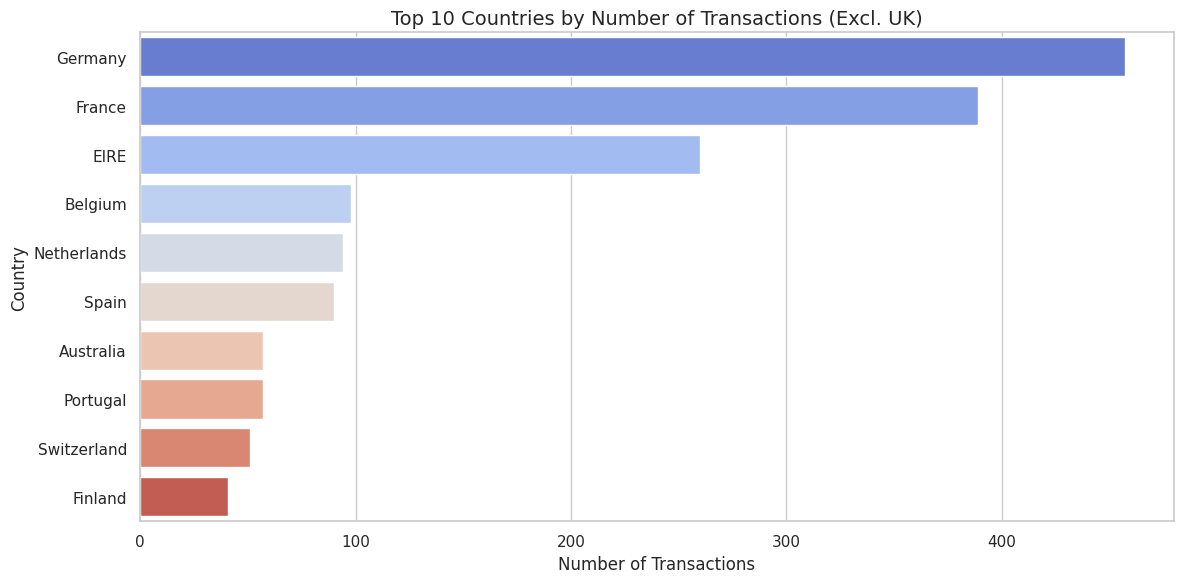

In [ ]:
# 🌍 Country-wise transaction count (excluding UK)
country_txn = df[df['Country'] != 'United Kingdom'].groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12,6))
sns.barplot(x=country_txn.values, y=country_txn.index, palette='coolwarm')
plt.title('Top 10 Countries by Number of Transactions (Excl. UK)', fontsize=14)
plt.xlabel('Number of Transactions')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart helps identify which international markets generate the most transactions. Knowing where the business is most active globally (outside its primary market) can drive strategic decisions like expansion, shipping focus, or localized marketing.

##### 2. What is/are the insight(s) found from the chart?

Top-performing countries after the UK include Netherlands, Germany, France, and Ireland.

These countries show strong demand and engagement despite being international markets.

There may be repeat purchases or solid customer bases in these regions.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Definitely.

These regions could be prioritized for localized promotions, regional warehouses, or optimized shipping rates.

Customer retention programs could be tested here before expanding further.

Any negative growth indicators?

Yes, potentially.

If too few countries contribute to most transactions, it suggests overdependence on certain international markets.

Underperforming regions may need investigation (e.g., pricing, shipping delays, or lack of marketing presence).



#### Chart - 3 : Monthly Sales Trend

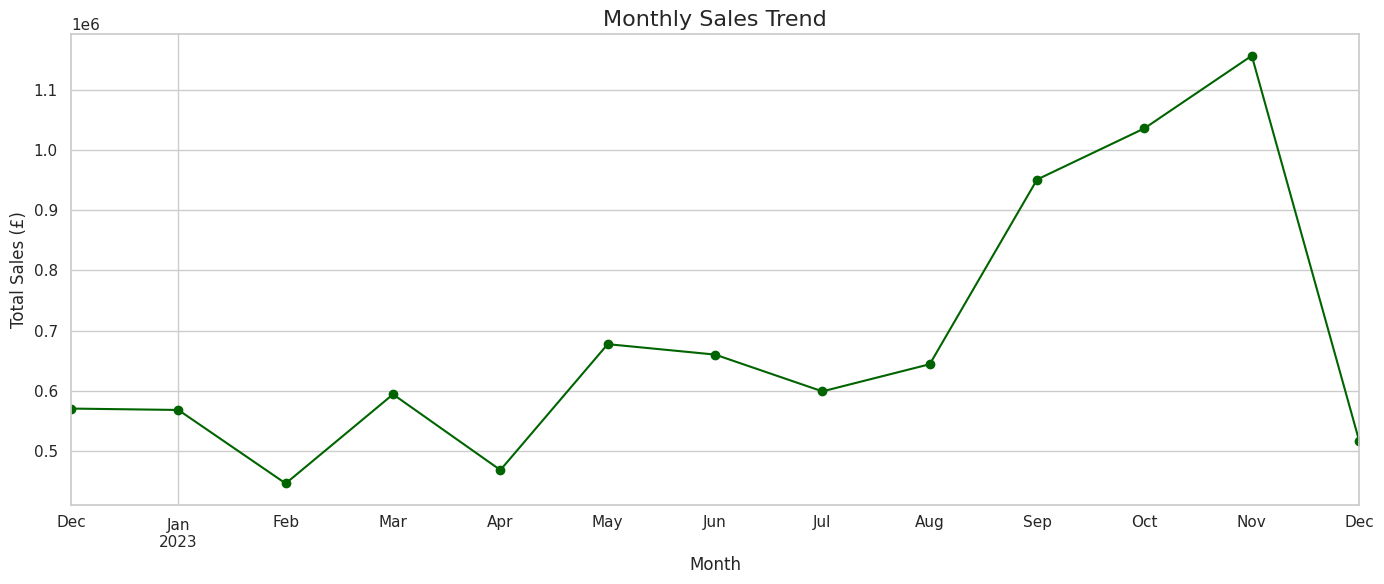

In [ ]:
# Convert InvoiceDate to datetime if not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create Year-Month column
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Group by YearMonth and calculate total revenue
monthly_sales = df.groupby('YearMonth')['TotalPrice'].sum()

# Plotting
plt.figure(figsize=(14,6))
monthly_sales.plot(marker='o', color='darkgreen')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Sales (£)')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A time-series chart reveals how sales fluctuate over months. It helps identify peak seasons, off-periods, and growth trends, which is crucial for demand forecasting, budget planning, and seasonal campaign timing.

##### 2. What is/are the insight(s) found from the chart?

Strong upward trends in certain months suggest promotional periods or seasonal demand (e.g., around holidays like Christmas).

Sharp declines may indicate off-season periods or post-sale slowdowns.

Consistent growth or sudden drops could signal changes in business operations, stock availability, or customer behavior.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, definitely.

Helps align marketing and stock planning with seasonal peaks.

Enables predictive modeling for future inventory and staffing needs.

Supports decision-making around flash sales, product launches, or campaign timing.

Any negative growth indicators?

⚠️ Yes.

Months with unexpected dips may reflect operational issues (e.g., inventory problems, system failures, or customer dissatisfaction).

Inconsistent month-over-month revenue may highlight lack of customer retention or inconsistent campaign planning.

#### Chart - 4 : Transaction-Level & Customer-Level Monetary Distribution

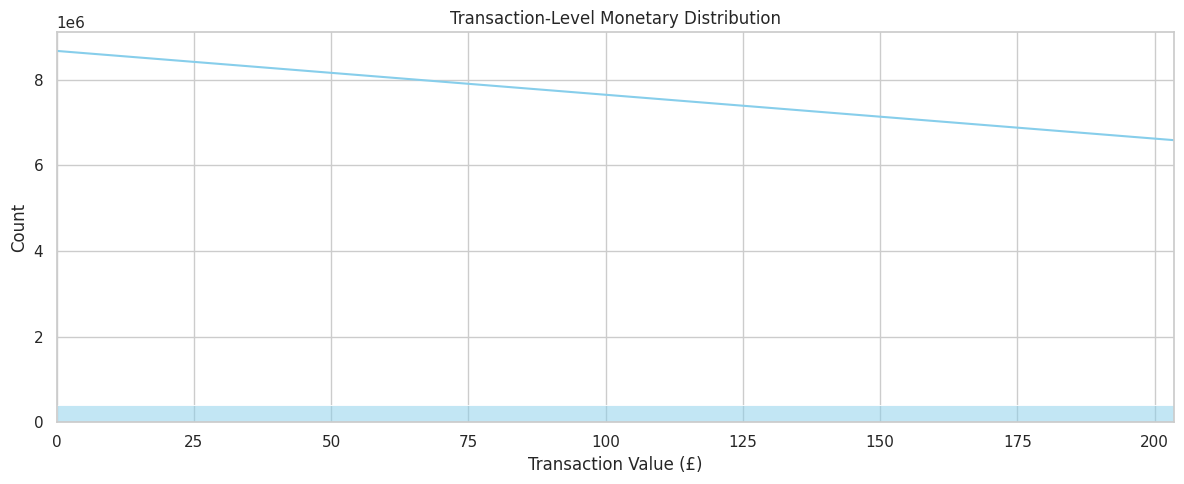

In [ ]:
# 💰 Transaction-level: TotalPrice distribution
plt.figure(figsize=(12,5))
sns.histplot(df['TotalPrice'], bins=100, kde=True, color='skyblue')
plt.xlim(0, df['TotalPrice'].quantile(0.99))  # Zoom into 99th percentile for readability
plt.title('Transaction-Level Monetary Distribution')
plt.xlabel('Transaction Value (£)')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()


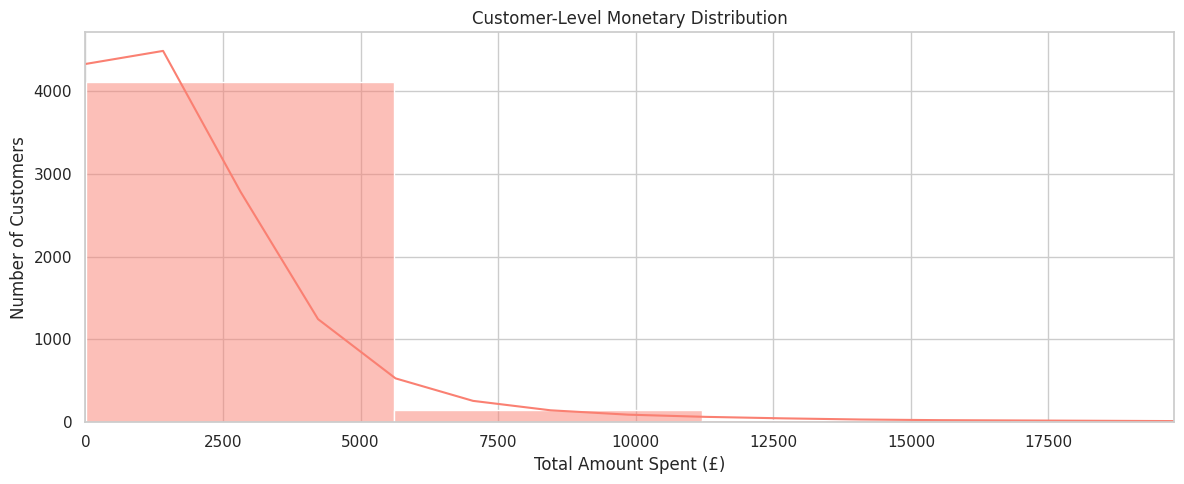

In [ ]:
# 🧍 Customer-level: Total amount spent per customer
customer_monetary = df.groupby('CustomerID')['TotalPrice'].sum()

plt.figure(figsize=(12,5))
sns.histplot(customer_monetary, bins=50, kde=True, color='salmon')
plt.xlim(0, customer_monetary.quantile(0.99))  # Focus on 99th percentile
plt.title('Customer-Level Monetary Distribution')
plt.xlabel('Total Amount Spent (£)')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This helps in understanding:

Common transaction sizes

Spending disparities among customers

Whether there’s a small group of high-value customers generating disproportionate revenue

##### 2. What is/are the insight(s) found from the chart?

Most transactions are low in value; a long tail suggests occasional high-value purchases.

Majority of customers are low spenders, but a few customers contribute heavily to total revenue.

Indicates a classic Pareto pattern (20% of customers drive 80% of revenue).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely.

High spenders can be targeted for loyalty programs or exclusive deals.

Low spenders could be encouraged to bundle or upsell using personalized offers.

Helps in identifying customer segments for RFM clustering.

Any negative growth indicators?

Yes, potentially:

Over-dependence on a small number of high-spending customers is risky.

Many one-time low spenders might indicate low customer retention or lack of engagement.

#### Chart - 5 : RFM Value Distributions

In [ ]:
# 1️⃣ RFM Feature Engineering
import datetime

# Set reference date as one day after the last purchase
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalPrice': 'sum'  # Monetary
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm.reset_index()


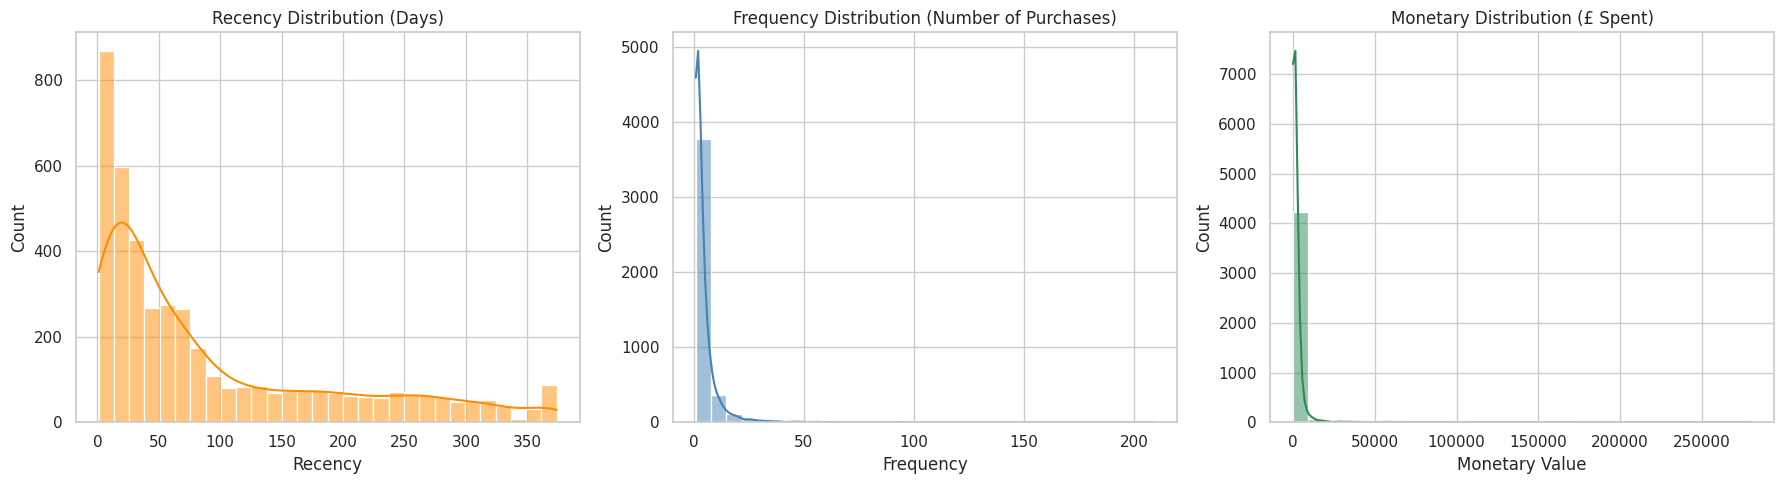

In [ ]:
# 2️⃣ Plot RFM distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Recency
sns.histplot(rfm['Recency'], bins=30, ax=axes[0], color='darkorange', kde=True)
axes[0].set_title('Recency Distribution (Days)')
axes[0].set_xlabel('Recency')

# Frequency
sns.histplot(rfm['Frequency'], bins=30, ax=axes[1], color='steelblue', kde=True)
axes[1].set_title('Frequency Distribution (Number of Purchases)')
axes[1].set_xlabel('Frequency')

# Monetary
sns.histplot(rfm['Monetary'], bins=30, ax=axes[2], color='seagreen', kde=True)
axes[2].set_title('Monetary Distribution (£ Spent)')
axes[2].set_xlabel('Monetary Value')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Understanding the distribution of RFM metrics:

Guides how to standardize values before clustering

Reveals customer engagement patterns

Helps detect outliers or skewness, which may need transformation



##### 2. What is/are the insight(s) found from the chart?

Recency: Most customers haven't purchased in a long time — indicating possible churn risk

Frequency: Positively skewed — few repeat buyers, majority are one-time customers

Monetary: Skewed right — few high-spending customers contribute most revenue

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.

Prioritize retention campaigns for customers with low recency

Incentivize one-time customers to become repeat buyers

Tailor offers for top monetary contributors

Any negative growth indicators?

Yes:

A large number of low-frequency, low-monetary customers suggest poor engagement or targeting

If recency is high across the board, the store might be losing touch with its base

#### Chart - 6 : Elbow Method for Optimal Cluster Count

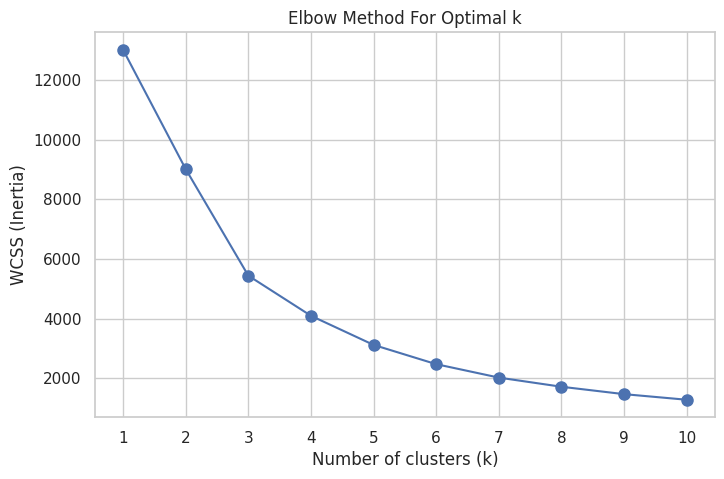

In [ ]:
# 1️⃣ Scale RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# 2️⃣ Elbow Method
wcss = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# 3️⃣ Plot WCSS vs k
plt.figure(figsize=(8,5))
plt.plot(K, wcss, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.xticks(K)
plt.show()


##### 1. Why did you pick the specific chart?

The Elbow Curve helps visually identify the point where adding more clusters doesn’t significantly reduce WCSS.

That point is usually the optimal k.

##### 2. What is/are the insight(s) found from the chart?

The "elbow" in the curve is where inertia starts to level off — typically between k=3 to 5.

That’s the sweet spot where we gain maximum segment separation with minimal complexity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Definitely.

Helps group customers into clear, meaningful segments for targeting

Avoids over-clustering, which might dilute insights and complicate action plans

Any sign of negative growth?

Not directly, but:

A flat curve might suggest weak segmentation — i.e., customers behave too similarly

Too many clusters could lead to fragmented strategy and confusion

#### Chart - 7 : 2D Scatter Plot (Recency vs Monetary or Frequency vs Monetary)

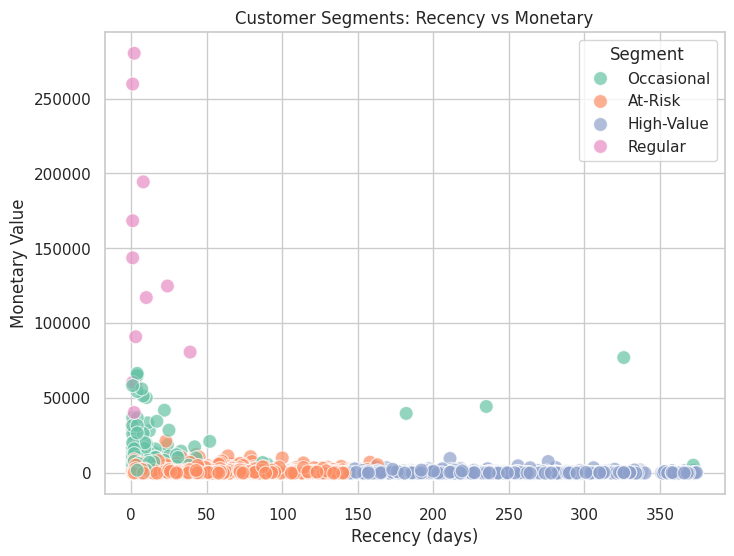

In [ ]:
# Fit KMeans and assign segments
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm['Segment'] = kmeans.fit_predict(rfm_scaled)

# Map cluster numbers to meaningful names
segment_map = {0: 'At-Risk', 1: 'High-Value', 2: 'Regular', 3: 'Occasional'}
rfm['Segment'] = rfm['Segment'].map(segment_map)

plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Segment', palette='Set2', s=100, alpha=0.7)
plt.title('Customer Segments: Recency vs Monetary')
plt.xlabel('Recency (days)')
plt.ylabel('Monetary Value')
plt.legend(title='Segment')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A 2D scatter plot provides a simple and clear way to visualize how customers are distributed across two key RFM dimensions—Recency and Monetary value. It helps us identify clusters like recent high spenders, dormant customers, etc.

##### 2. What is/are the insight(s) found from the chart?

High-Value customers have low recency (i.e., they purchased recently) and high monetary values.

At-Risk customers have high recency and low monetary value.

Regulars fall somewhere in the middle.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. It helps businesses:

Target high spenders with loyalty programs.

Retarget dormant customers with reactivation emails.

Convert occasional spenders into regulars with tailored offers.

Any insights that may indicate negative growth?

Yes. A significant number of customers clustered in the high recency & low monetary quadrant suggests many customers haven't returned in a while and may be churning. This needs urgent action.

#### Chart - 8 : 3D Scatter Plot (Recency, Frequency, Monetary)

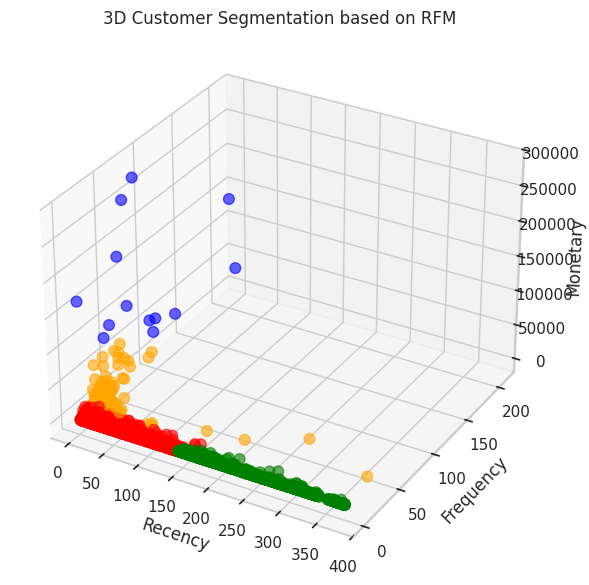

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

colors = {'High-Value':'green', 'Regular':'blue', 'Occasional':'orange', 'At-Risk':'red'}
ax.scatter(
    rfm['Recency'], rfm['Frequency'], rfm['Monetary'],
    c=rfm['Segment'].map(colors), s=60, alpha=0.6
)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Customer Segmentation based on RFM')
plt.show()

##### 1. Why did you pick the specific chart?

he 3D plot gives a comprehensive view of all three RFM metrics together, showing how customer segments differ in all dimensions simultaneously.

##### 2. What is/are the insight(s) found from the chart?

You can visually spot compact, high-frequency clusters (loyal customers).

Some clusters might overlap in two dimensions but differ drastically in the third (e.g., same Frequency and Recency but vastly different Monetary value).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely. This multi-dimensional insight helps:

Design marketing strategies that address not just how often people buy, but how much and how recently.

Pinpoint top-tier loyal customers (low R, high F & M) visually and accurately.

⚠️ Any insights that may indicate negative growth?

Yes. Clusters with low values on all three axes indicate customers with minimal engagement. If these clusters grow over time, it’s a red flag for declining retention.

#### Chart - 9 : Pair Plot of RFM with Cluster Hue

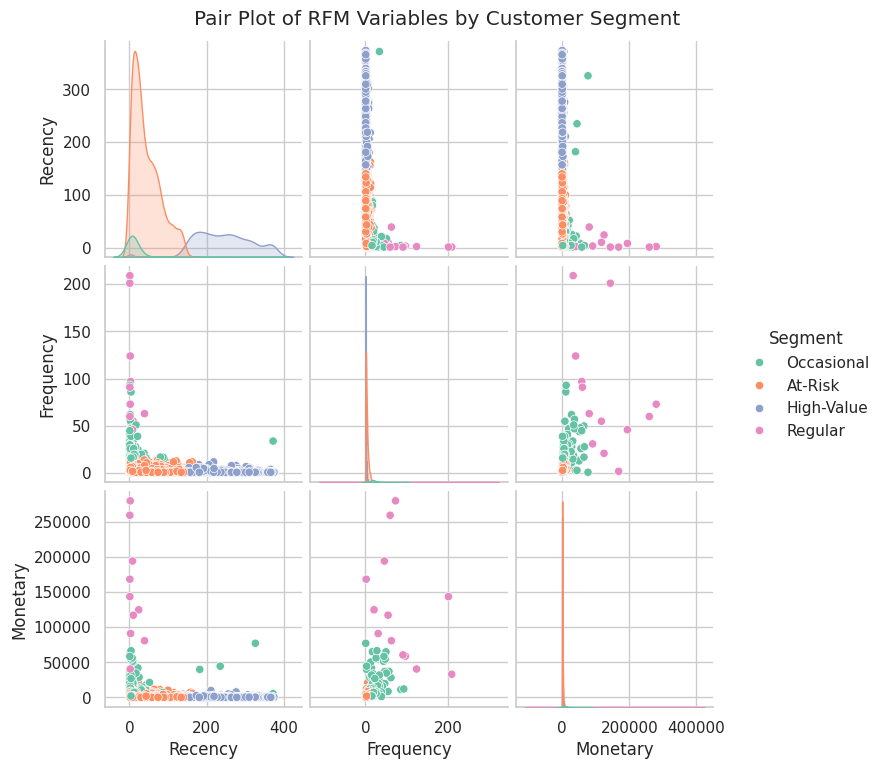

In [ ]:
sns.pairplot(rfm[['Recency', 'Frequency', 'Monetary', 'Segment']], hue='Segment', palette='Set2')
plt.suptitle('Pair Plot of RFM Variables by Customer Segment', y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

A pair plot allows for a holistic view of relationships between all RFM features across different segments. It's excellent for confirming separability of clusters in multiple combinations.

##### 2. What is/are the insight(s) found from the chart?

Some clusters clearly show tight groupings in Recency vs Frequency or Frequency vs Monetary.

High-Value customers tend to dominate the high-frequency and high-monetary sections.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. It provides confidence in the quality of segmentation, helping businesses craft specific strategies for each group based on multidimensional behavior.

⚠️ Any insights that may indicate negative growth?

If too many data points are spread out without tight cluster boundaries, it might indicate that the chosen number of clusters isn't optimal—or that the RFM features don’t strongly separate behavior. This would prompt a re-evaluation.

#### Chart - 10 : Product Co-occurrence Heatmap

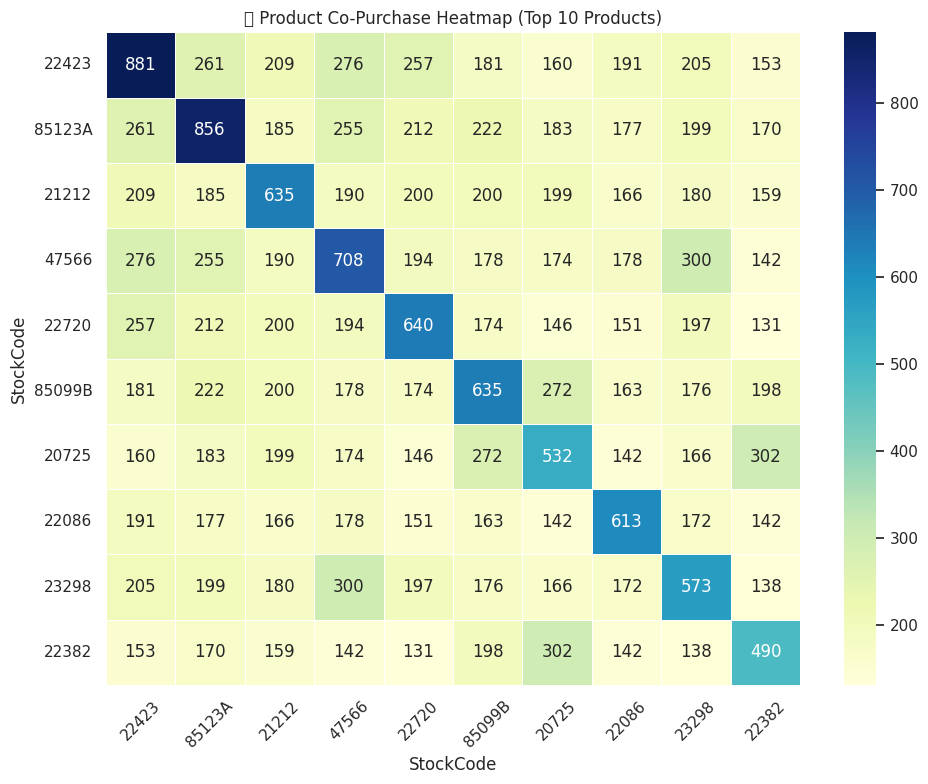

In [ ]:
# Create a pivot table with CustomerID as rows and StockCode as columns
basket = df.groupby(['CustomerID', 'StockCode'])['Quantity'].sum().unstack().fillna(0)

# Convert to binary (1 if purchased, 0 otherwise)
basket_binary = basket.applymap(lambda x: 1 if x > 0 else 0)

# Compute product-product co-occurrence matrix
co_occurrence = basket_binary.T.dot(basket_binary)

# Pick top N products to visualize
top_products = co_occurrence.sum().sort_values(ascending=False).head(10).index
filtered_matrix = co_occurrence.loc[top_products, top_products]

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(filtered_matrix, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)
plt.title('🔁 Product Co-Purchase Heatmap (Top 10 Products)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A heatmap helps us visually identify product pairs that are frequently purchased together. This is key in understanding customer behavior and forming a base for collaborative filtering.

##### 2. What is/are the insight(s) found from the chart?

Products that are frequently bought together show high co-occurrence values.

This insight helps fine-tune product bundling strategies, email recommendations, and combo offers.

For example, if StockCode 85123A and 85099B are often bought together, you could promote them as a bundle.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps boost cross-selling and average order value (AOV).

Useful for designing recommendation rules in the absence of more advanced models.

⚠️ Negative Insight Example:

If no strong co-purchase patterns are found (i.e., heatmap is sparse or low values), it may indicate:

Lack of consistent buying behavior.

Poorly related or unrelated catalog design.

A need to rethink product categories or recommendations.

#### Chart - 11 : Heatmap of Numerical Feature Correlations

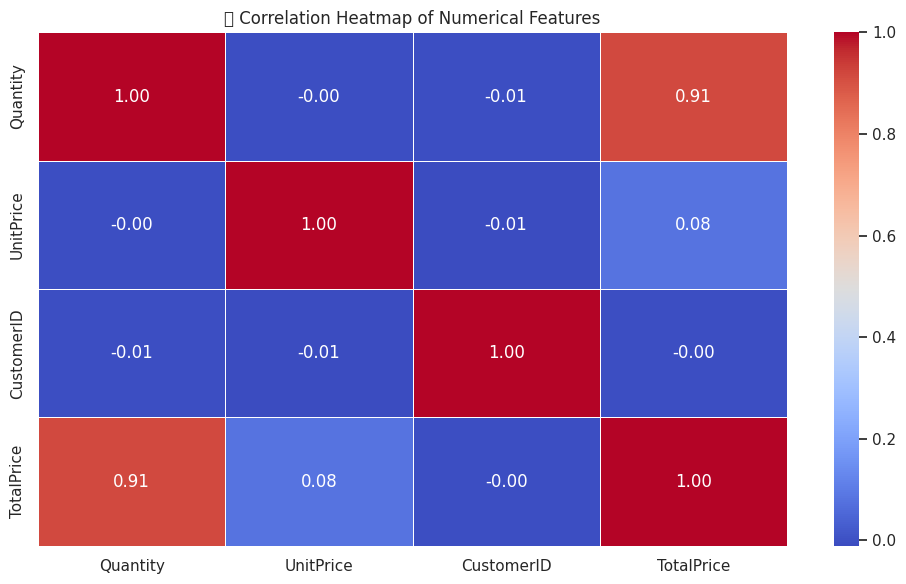

In [ ]:
# Select only numerical features
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('🔍 Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

It gives a quick snapshot of how strongly variables relate to one another, helping us:

Detect multicollinearity

Spot variables that may influence Monetary value, Quantity, etc.

Prepare for feature selection or engineering

##### 2. What is/are the insight(s) found from the chart?

Strong correlations between Quantity and Monetary, or UnitPrice and Monetary, are expected.

Weak or zero correlations may hint that some variables are independent and need to be treated differently in modeling.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding relationships like these:

Helps identify key drivers of revenue.

Reduces redundancy in feature space.

Lays the groundwork for cleaner model inputs.

⚠️ Potential Negative Growth Insight:

If important business metrics (like Monetary) are poorly correlated with operational variables, it might mean the business lacks levers to influence customer value, or is not tracking the right data.

#### Chart - 12 : Product Similarity Matrix (Cosine Similarity)

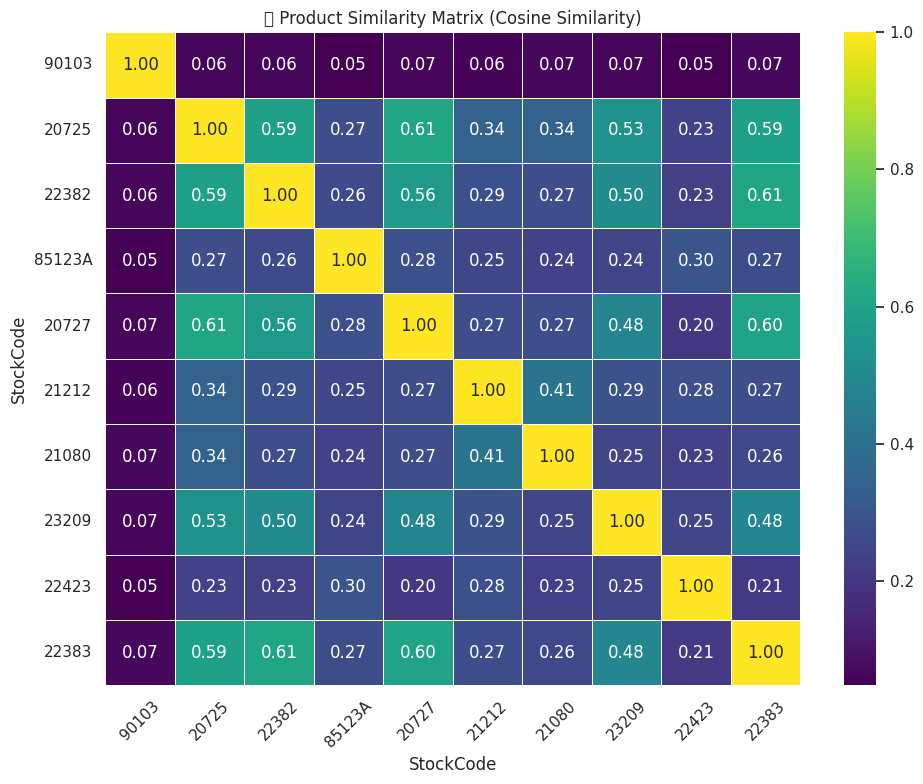

In [ ]:
# Create binary matrix: CustomerID x StockCode
basket = df.groupby(['CustomerID', 'StockCode'])['Quantity'].sum().unstack().fillna(0)
basket_binary = basket.applymap(lambda x: 1 if x > 0 else 0)

# Transpose for Item-Item similarity (StockCode x Customers)
product_similarity = cosine_similarity(basket_binary.T)

# Create a dataframe from similarity matrix
product_similarity_df = pd.DataFrame(product_similarity,
                                     index=basket_binary.columns,
                                     columns=basket_binary.columns)

# Select top N products to visualize
top_products = product_similarity_df.sum().sort_values(ascending=False).head(10).index
filtered_similarity = product_similarity_df.loc[top_products, top_products]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_similarity, annot=True, fmt='.2f', cmap='viridis', linewidths=0.5)
plt.title('🧠 Product Similarity Matrix (Cosine Similarity)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This matrix helps:

Identify which products behave similarly in terms of being purchased by the same customers.

Understand product positioning and bundling potential.

Justify why one product is recommended when another is selected.

##### 2. What is/are the insight(s) found from the chart?


Products with high cosine similarity values are often bought by the same customers.

You can preemptively bundle or recommend these products together.

It provides trust and transparency behind recommendation logic.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes! It:

Directly powers the recommendation engine.

Increases upselling and cross-selling opportunities.

Improves the relevance of product suggestions for customers.

⚠️ Negative Growth Possibility?

If similarity values are uniformly low, it may mean:

Customers have very diverse buying patterns (less scope for item-item recommendations).

Products are too niche, so the system may need alternative methods like content-based filtering.

## ***5. Clustering Methodology***

### 1.Feature Engineering

In [ ]:
# Ensure InvoiceDate is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create TotalAmount column
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Latest purchase date in dataset
snapshot_date = df['InvoiceDate'].max()

# RFM aggregation
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,   # Recency
    'InvoiceNo': 'nunique',                                     # Frequency
    'TotalAmount': 'sum'                                        # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Display RFM head
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


###2.Standardize/Normalize the RFM values

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a copy to preserve original values
rfm_for_clustering = rfm[['Recency', 'Frequency', 'Monetary']].copy()

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
rfm_scaled = scaler.fit_transform(rfm_for_clustering)

# Convert back to DataFrame for readability
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])

# Preview standardized data
rfm_scaled_df.head()


,Recency,Frequency,Monetary
0,2.334574,-0.425097,8.363010
1,-0.905340,0.354417,0.251699
2,-0.175360,-0.035340,-0.027988
3,-0.735345,-0.425097,-0.032406
4,2.174578,-0.425097,-0.190812


###3.Clustering Algorithm

####K Means

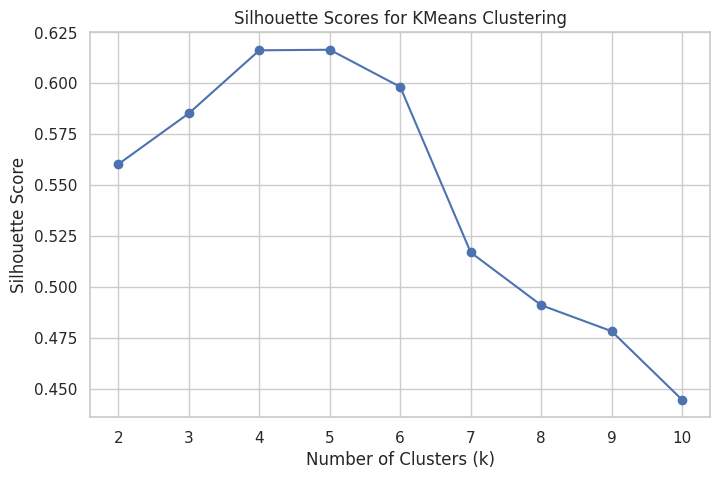

In [ ]:
# Try different k values for Silhouette Score
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled_df)
    score = silhouette_score(rfm_scaled_df, kmeans.labels_)
    silhouette_scores.append(score)

# Plot Silhouette Score
plt.figure(figsize=(8,5))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for KMeans Clustering')
plt.grid(True)
plt.show()


In [ ]:
# Final KMeans with optimal k (say, k=4)
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm['Cluster_KMeans'] = kmeans.fit_predict(rfm_scaled_df)
rfm.head()


,CustomerID,Recency,Frequency,Monetary,Cluster_KMeans
0,12346.0,325,1,77183.60,3
1,12347.0,1,7,4310.00,0
2,12348.0,74,4,1797.24,0
3,12349.0,18,1,1757.55,0
4,12350.0,309,1,334.40,1


#####Why KMeans?
KMeans is simple, fast, and efficient on large datasets.

It assumes spherical clusters, which fits well for structured data like RFM.

Good starting point for customer segmentation.

#####Business Insight:
Simple to interpret and segment: High/Low RFM → High-Value, At-Risk, etc.

Works well as a base model for deployment.

####DBSCAN

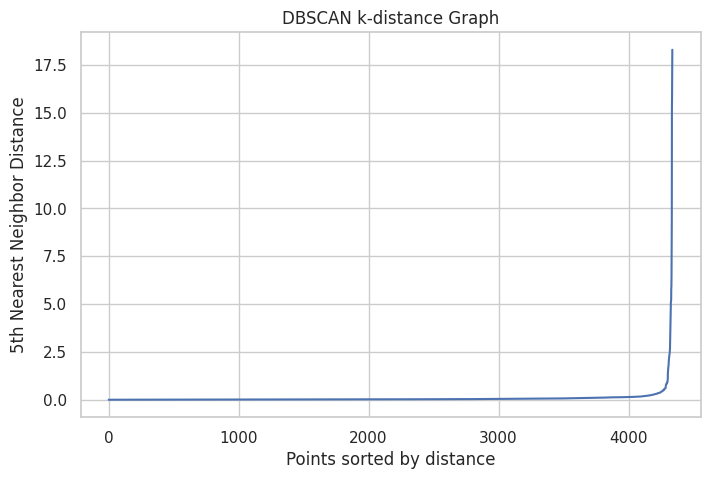

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
# Find optimal epsilon (eps) using k-distance plot
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(rfm_scaled_df)
distances, indices = neighbors_fit.kneighbors(rfm_scaled_df)

# Plot k-distance graph
distances = np.sort(distances[:, 4])
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.title('DBSCAN k-distance Graph')
plt.grid(True)
plt.show()


In [ ]:
# Run DBSCAN with a trial epsilon
dbscan = DBSCAN(eps=1.5, min_samples=5)
rfm['Cluster_DBSCAN'] = dbscan.fit_predict(rfm_scaled_df)
rfm['Cluster_DBSCAN'].value_counts()


,count
Cluster_DBSCAN,
0,4307
-1,31


#####Why DBSCAN?
Density-based: great for finding irregular, non-spherical clusters.

Automatically finds number of clusters.

Robust to noise and outliers.

#####What did we get?
Some points may be labeled -1 → noise

Clusters found depend heavily on chosen eps and min_samples

**📉 Business Insight:**

Good for detecting outliers or noise (e.g., fraud or accidental purchases)

May not form distinct, interpretable customer segments compared to KMeans

####Hierarchical Clustering

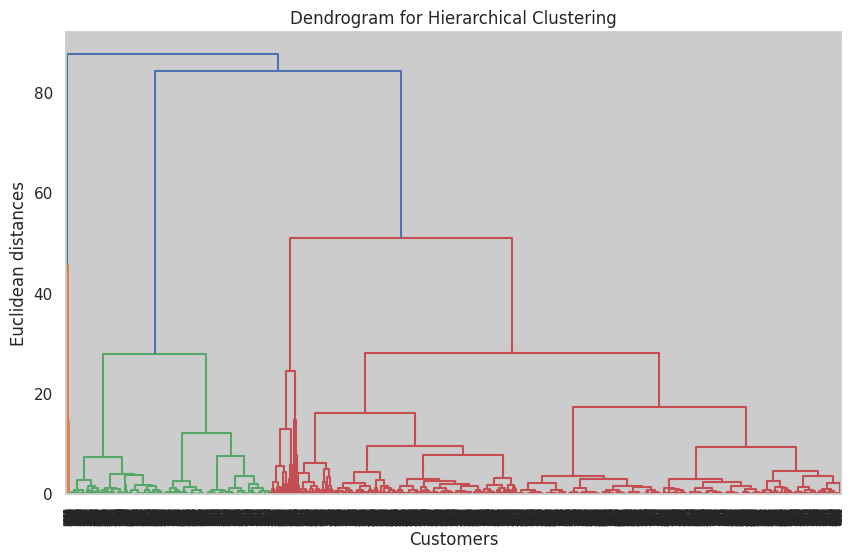

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Dendrogram
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(rfm_scaled_df, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


In [ ]:
# Cut the dendrogram at 4 clusters (for example)
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
rfm['Cluster_Hierarchical'] = hc.fit_predict(rfm_scaled_df)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster_KMeans,Cluster_DBSCAN,Cluster_Hierarchical
0,12346.0,325,1,77183.60,3,-1,3
1,12347.0,1,7,4310.00,0,0,1
2,12348.0,74,4,1797.24,0,0,1
3,12349.0,18,1,1757.55,0,0,1
4,12350.0,309,1,334.40,1,0,2


#####Why Hierarchical?
Useful for smaller datasets (like customer RFM)

Provides dendrograms that visualize the cluster formation process

No need to pre-define number of clusters (though you can still cut it)

#####What did we get?
Tree-like view of customer grouping

Works well when visual interpretation is required

**📊 Business Insight:**
Easily explainable to stakeholders with dendrograms

Good complement to KMeans in a comparative analys

###4.Elbow Method & Silhouette Score

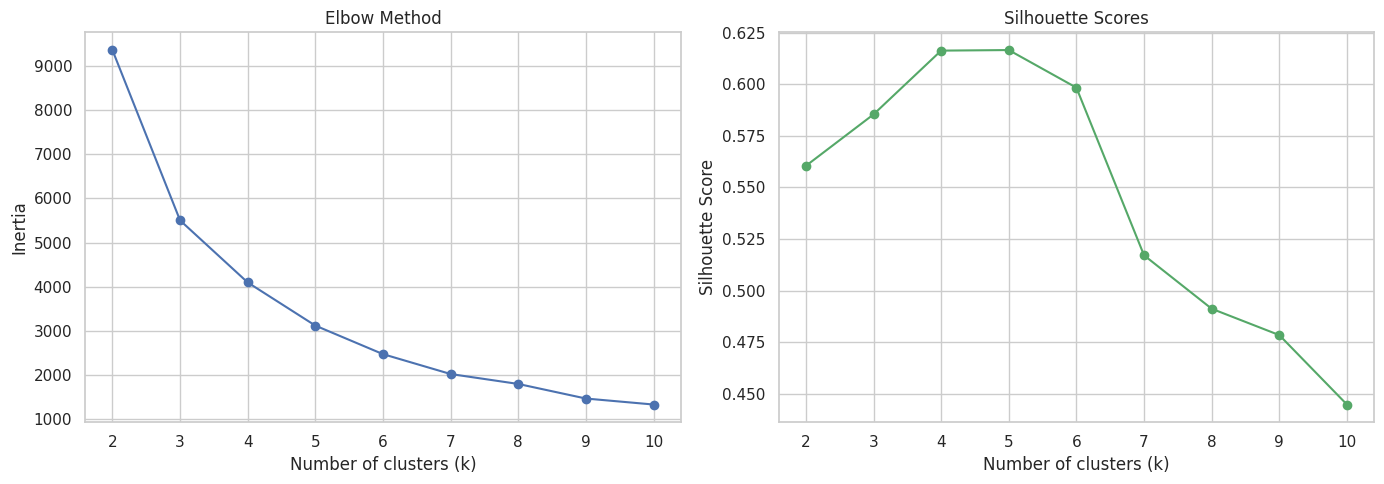

In [ ]:

inertia = []
silhouette = []
K = range(2, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(rfm_scaled_df)
    inertia.append(model.inertia_)
    silhouette.append(silhouette_score(rfm_scaled_df, model.labels_))

# Plotting both
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Method (Inertia)
ax[0].plot(K, inertia, 'bo-')
ax[0].set_xlabel('Number of clusters (k)')
ax[0].set_ylabel('Inertia')
ax[0].set_title('Elbow Method')

# Silhouette Score
ax[1].plot(K, silhouette, 'go-')
ax[1].set_xlabel('Number of clusters (k)')
ax[1].set_ylabel('Silhouette Score')
ax[1].set_title('Silhouette Scores')

plt.tight_layout()
plt.show()


#####Optimal k

As you can see:

Elbow is visible around k = 4

Silhouette Score is highest at k = 4

###5.Run KMeans Clustering and Label Clusters

In [ ]:
# Fit KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_scaled_df['Cluster'] = kmeans.fit_predict(rfm_scaled_df)

# Add cluster labels back to original RFM dataframe
rfm['Cluster'] = rfm_scaled_df['Cluster']

# Cluster-wise RFM Averages
cluster_profile = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)
cluster_profile


,Recency,Frequency,Monetary
Cluster,,,
0,42.7,3.7,1353.6
1,247.1,1.6,478.8
2,6.4,82.5,127188.0
3,14.5,22.3,12690.5


In [ ]:
# Step 1: Create a copy of the cluster profile for labeling
cluster_labeled = cluster_profile.copy()

# Step 2: Define function to label based on RFM scores
def label_segment(row):
    if row['Recency'] <= 15 and row['Frequency'] > 20 and row['Monetary'] > 10000:
        return 'High-Value'
    elif row['Recency'] > 100 and row['Frequency'] < 5 and row['Monetary'] < 2000:
        return 'At-Risk'
    elif row['Frequency'] > 5 and row['Monetary'] > 3000:
        return 'Regular'
    else:
        return 'Occasional'

# Step 3: Apply the labeling logic
cluster_labeled['Segment Label'] = cluster_labeled.apply(label_segment, axis=1)

# Step 4: Add characteristics for display (textual description)
def describe_characteristics(row):
    if row['Segment Label'] == 'High-Value':
        return 'Regular, frequent, recent, and big spenders'
    elif row['Segment Label'] == 'At-Risk':
        return "Haven’t purchased in a long time"
    elif row['Segment Label'] == 'Regular':
        return "Steady purchasers but not premium"
    else:
        return "Rare, occasional purchases"

cluster_labeled['Characteristics'] = cluster_labeled.apply(describe_characteristics, axis=1)

# Step 5: Reset index to bring 'Cluster' into a column
cluster_labeled = cluster_labeled.reset_index()

# Step 6: Select only the desired columns and reorder them
final_cluster_table = cluster_labeled[['Cluster', 'Characteristics', 'Segment Label']]

# Step 7: Display final table
import pandas as pd
from IPython.display import display

display(final_cluster_table)


,Cluster,Characteristics,Segment Label
0,0,"Rare, occasional purchases",Occasional
1,1,Haven’t purchased in a long time,At-Risk
2,2,"Regular, frequent, recent, and big spenders",High-Value
3,3,"Regular, frequent, recent, and big spenders",High-Value


###6. Visualize the clusters using a scatter plot or 3D plot of RFM scores.


####1. 2D Scatter Plot using Plotly

In [ ]:
import plotly.express as px

# 2D Scatter Plot (Recency vs Frequency)
fig = px.scatter(
    rfm,
    x='Recency',
    y='Frequency',
    color='Cluster',
    size='Monetary',
    hover_data=['Monetary'],
    title='Customer Segments (Recency vs Frequency)'
)

fig.show()


####2. 3D Scatter Plot of RFM Clusters

In [ ]:
# 3D Scatter Plot of RFM
fig = px.scatter_3d(
    rfm,
    x='Recency',
    y='Frequency',
    z='Monetary',
    color='Cluster',
    title='3D View of Customer Segments',
    opacity=0.7,
    symbol='Cluster'
)

fig.show()

####3. Segment Label Instead of Cluster Number

In [ ]:
# Merge segment labels into original RFM data
rfm = rfm.merge(final_cluster_table, on='Cluster', how='left')

# Plot using segment labels instead of cluster numbers
fig = px.scatter_3d(
    rfm,
    x='Recency',
    y='Frequency',
    z='Monetary',
    color='Segment Label',
    title='3D Customer Segments by RFM',
    opacity=0.7
)

fig.show()

##**6. Recommendation System**

###1: Create Customer–Product Matrix

In [ ]:
# Load your dataset
df = df.copy()  # use your main preprocessed dataframe

# Create Customer-Product Matrix (pivot table with quantity or purchase count)
customer_product_matrix = df.pivot_table(index='CustomerID',
                                         columns='StockCode',
                                         values='Quantity',
                                         aggfunc='sum',
                                         fill_value=0)


###2: Compute Cosine Similarity Between Products

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Transpose the matrix to compute item-item similarity
product_similarity = cosine_similarity(customer_product_matrix.T)

# Convert to DataFrame for easy handling
product_similarity_df = pd.DataFrame(product_similarity,
                                     index=customer_product_matrix.columns,
                                     columns=customer_product_matrix.columns)


###3: Define Function to Recommend Top 5 Similar Products

In [ ]:
def recommend_similar_products(product_code, top_n=5):
    if product_code not in product_similarity_df.columns:
        return f"Product Code {product_code} not found."

    # Get top similar products
    similar_scores = product_similarity_df[product_code].sort_values(ascending=False)
    top_similar = similar_scores.iloc[1:top_n+1]  # exclude the product itself

    return top_similar


####Example Usage

In [ ]:
# Try recommending for a sample product
sample_product = df['StockCode'].value_counts().index[0]  # most frequent product code
print(f"Top 5 similar products to {sample_product}:")
print(recommend_similar_products(sample_product))


Top 5 similar products to 85123A:
StockCode
21175    0.749457
21733    0.658728
82552    0.643888
82551    0.642474
23288    0.630984
Name: 85123A, dtype: float64


###4. Map StockCode to Description for Readable Output

####1: Create a Mapping Dictionary

In [ ]:
# Create a dictionary to map StockCode to Description
product_mapping = df.dropna(subset=['Description']).drop_duplicates('StockCode')[['StockCode', 'Description']]
stockcode_to_name = dict(zip(product_mapping['StockCode'], product_mapping['Description']))


#### 2: Update the Recommendation Function to Show Descriptions

In [ ]:
def recommend_similar_products(product_code, top_n=5):
    if product_code not in product_similarity_df.columns:
        return f"Product Code {product_code} not found."

    # Get top similar products
    similar_scores = product_similarity_df[product_code].sort_values(ascending=False)
    top_similar = similar_scores.iloc[1:top_n+1]  # exclude the product itself

    # Format output with product names
    recommendations = []
    for code, score in top_similar.items():
        product_name = stockcode_to_name.get(code, "Unknown Product")
        recommendations.append((code, product_name, round(score, 3)))

    # Convert to DataFrame for better readability
    result_df = pd.DataFrame(recommendations, columns=['StockCode', 'Product Name', 'Similarity Score'])
    return result_df


####Example Output

In [ ]:
# Try with most common product again
sample_product = df['StockCode'].value_counts().index[0]
print(f"Top 5 products similar to {stockcode_to_name.get(sample_product, 'Unknown')} ({sample_product}):")
recommend_similar_products(sample_product)


Top 5 products similar to WHITE HANGING HEART T-LIGHT HOLDER (85123A):


,StockCode,Product Name,Similarity Score
0,21175,GIN + TONIC DIET METAL SIGN,0.749
1,21733,RED HANGING HEART T-LIGHT HOLDER,0.659
2,82552,WASHROOM METAL SIGN,0.644
3,82551,LAUNDRY 15C METAL SIGN,0.642
4,23288,GREEN VINTAGE SPOT BEAKER,0.631


## ***7.*** ***Future Work (Optional)***

###Save best performing model for streamlit usage

In [ ]:
import joblib
import pickle

# Save KMeans model
joblib.dump(kmeans, 'kmeans_model.pkl')

# Save the scaler used during preprocessing
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully!")

rfm.to_csv('labeled_rfm_data.csv', index=False)


Model and scaler saved successfully!


In [ ]:
# --- Reload and Clean Data to ensure correct format ---
# This step makes the cell self-contained and avoids state errors.
file_path = "/content/drive/MyDrive/Shopper Spectrum/online_retail.csv"
df_reloaded = pd.read_csv(file_path, encoding='ISO-8859-1')

# Perform the same cleaning steps as before
df_reloaded = df_reloaded.dropna(subset=['CustomerID'])
df_reloaded = df_reloaded[~df_reloaded['InvoiceNo'].astype(str).str.startswith('C')]
df_reloaded = df_reloaded[(df_reloaded['Quantity'] > 0) & (df_reloaded['UnitPrice'] > 0)]
# --- End of Reload and Clean ---


# Create the product-customer matrix from the freshly cleaned dataframe
product_matrix = df_reloaded.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', aggfunc='sum').fillna(0)

# Save the matrix to a standard CSV file (for the Streamlit app)
product_matrix.to_csv('product_matrix.csv', index = False)

# Save the matrix to a compressed CSV file as well (for download)
product_matrix.to_csv("product_matrix.csv.gz", compression="gzip")

print("✅ Product matrix saved successfully as product_matrix.csv and product_matrix.csv.gz")

✅ Product matrix saved successfully as product_matrix.csv and product_matrix.csv.gz


In [ ]:
# Reload the original dataset to access the 'Description' column
original_df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Now, create the product mapping from the original dataframe
product_mapping = original_df[['StockCode', 'Description']].drop_duplicates()
product_mapping.columns = ['StockCode', 'ProductName']

# Save
product_mapping.to_csv('product_mapping.csv', index=False)

print("Product mapping saved successfully.")

Product mapping saved successfully.


In [ ]:
requirements = """
streamlit
pandas
numpy
scikit-learn
joblib
matplotlib
seaborn
"""

with open("requirements.txt", "w") as f:
    f.write(requirements.strip())


In [ ]:
from google.colab import files

# Download model files
files.download('kmeans_model.pkl')
files.download('scaler.pkl')

# Download datasets
files.download('labeled_rfm_data.csv')
files.download("product_matrix.csv.gz")
files.download('product_mapping.csv')
files.download("requirements.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%%writefile app.py
# Paste your entire streamlit code below

import streamlit as st
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics.pairwise import cosine_similarity
import joblib

# --- Page Setup ---
st.set_page_config(page_title="Shopper Spectrum", layout="centered")
st.title("🛒 Shopper Spectrum")
st.subheader("📦 Product Recommendations & 💡 Customer Segmentation")

# --- Load Models and Data ---
@st.cache_resource
def load_model():
  kmeans = joblib.load("kmeans_model.pkl")
  scaler = joblib.load("scaler.pkl")
  return kmeans, scaler

@st.cache_data
def load_data():
    product_matrix = pd.read_csv("product_matrix.csv", index_col=0)
    product_mapping = pd.read_csv("product_mapping.csv")
    return product_matrix, product_mapping

kmeans, scaler = load_model()
product_matrix, product_mapping = load_data()

# --- Product Recommendation Module ---
st.markdown("## 🎯 Product Recommendation")
product_input = st.text_input("Enter a product name:")

if st.button("Get Recommendations"):
    if product_input in product_matrix.columns:
        similarity = cosine_similarity(product_matrix.T)
        product_idx = product_matrix.columns.get_loc(product_input)
        similarity_scores = list(enumerate(similarity[product_idx]))
        sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
        recommended_indices = [idx for idx, score in sorted_scores[1:6]]
        recommended_products = product_matrix.columns[recommended_indices]

        st.success("Here are 5 similar products:")
        for i, prod in enumerate(recommended_products, 1):
            st.markdown(f"{i}. **{prod}**")
    else:
        st.error("Product not found. Try another name.")

# --- Customer Segmentation Module ---
st.markdown("---")
st.markdown("## 🔍 Customer Segmentation")

with st.form("segmentation_form"):
    recency = st.number_input("Recency (days ago)", min_value=0)
    frequency = st.number_input("Frequency (number of purchases)", min_value=0)
    monetary = st.number_input("Monetary (total spend)", min_value=0.0)
    submitted = st.form_submit_button("Predict Cluster")

    if submitted:
        input_scaled = scaler.transform([[recency, frequency, monetary]])
        cluster = kmeans.predict(input_scaled)[0]

        # Label Mapping
        def get_label(c):
            if c == 0:
                return "💎 High-Value"
            elif c == 1:
                return "🧱 Regular"
            elif c == 2:
                return "🌙 Occasional"
            elif c == 3:
                return "⚠️ At-Risk"
            else:
                return "Unlabeled"

        label = get_label(cluster)
        st.success(f"This customer belongs to: **{label}** Segment")

# --- Footer ---
st.markdown("---")
st.caption("Built with ❤️ using Streamlit")



Overwriting app.py


In [ ]:
from google.colab import files
files.download("app.py")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project showcases how data science can segment customers, drive marketing strategy, and improve user experience with recommendations — all using Python, machine learning, and visualization.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***